In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('states_all.csv')
# check null values
df.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

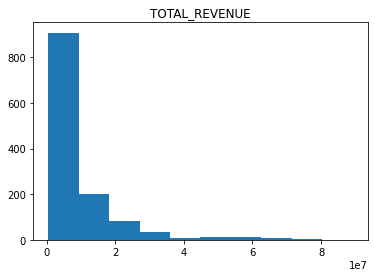

In [3]:
#1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
# histogram of TOTAL_REVENUE
plt.hist(df['TOTAL_REVENUE'])
plt.title('TOTAL_REVENUE')
plt.show()


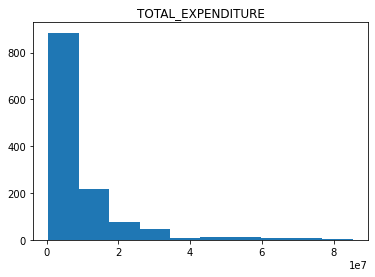

In [4]:
# histogram of TOTAL_EXPENDITURE
plt.hist(df['TOTAL_EXPENDITURE'])
plt.title('TOTAL_EXPENDITURE')
plt.show()

In [5]:
# total null values in TOTAL_REVENUE
print(df['TOTAL_REVENUE'].isnull().sum())

440


In [6]:
# total null values in TOTAL_EXPENDITURE
print(df['TOTAL_EXPENDITURE'].isnull().sum())

440


In [7]:
# there are null values in TOTAL_REVENUE and TOTAL_EXPENDITURE so we need to remove them for the analysis

In [8]:
# dropping the null values in TOTAL_REVENUE
df = df.dropna(subset=['TOTAL_REVENUE'])
# dropping the null values in TOTAL_EXPENDITURE
df = df.dropna(subset=['TOTAL_EXPENDITURE'])

In [9]:
# z-score analysis for TOTAL_REVENUE and TOTAL_EXPENDITURE
# z-score analysis for TOTAL_REVENUE
z_score_revenue = (df['TOTAL_REVENUE'] - df['TOTAL_REVENUE'].mean()) / df['TOTAL_REVENUE'].std()
# z-score analysis for TOTAL_EXPENDITURE
z_score_expenditure = (df['TOTAL_EXPENDITURE'] - df['TOTAL_EXPENDITURE'].mean()) / df['TOTAL_EXPENDITURE'].std()


In [10]:
# total outliers in TOTAL_REVENUE
print(z_score_revenue[z_score_revenue > 3].count())
# total outliers in TOTAL_EXPENDITURE
print(z_score_expenditure[z_score_expenditure > 3].count())


37
38


In [11]:
# so there are outliers

In [12]:
# checking with boxplot

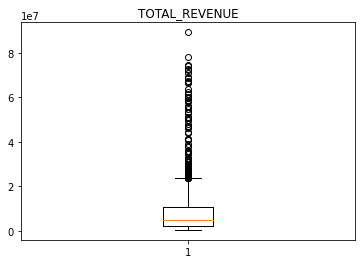

In [13]:
# boxplot of TOTAL_REVENUE
plt.boxplot(df['TOTAL_REVENUE'])
plt.title('TOTAL_REVENUE')
plt.show()

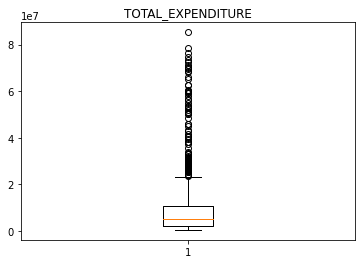

In [14]:
# boxplot of TOTAL_EXPENDITURE
plt.boxplot(df['TOTAL_EXPENDITURE'])
plt.title('TOTAL_EXPENDITURE')
plt.show()

In [15]:
# there are outliers in TOTAL_REVENUE
# there are outliers in TOTAL_EXPENDITURE

In [16]:
# Q2.  If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.
# winsorizing the outliers in TOTAL_REVENUE
from scipy.stats.mstats import winsorize
winsorize = winsorize(np.array(df['TOTAL_REVENUE'].dropna()), limits=[0.05, 0.095])
winsorize

masked_array(data=[ 2678885.,  1049591.,  3258079., ...,  3391579.,
                   11697466.,  2044669.],
             mask=False,
       fill_value=1e+20)

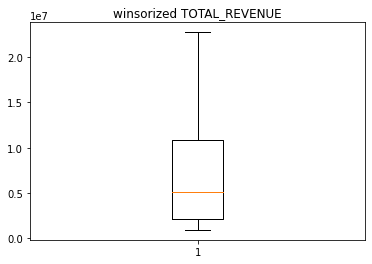

In [17]:
# boxplot of winsorized TOTAL_REVENUE
plt.boxplot(winsorize)
plt.title('winsorized TOTAL_REVENUE')
plt.show()

In [20]:
# winsorizing the outliers in TOTAL_EXPENDITURE
from scipy.stats.mstats import winsorize
winsorize_exp = winsorize(np.array(df['TOTAL_EXPENDITURE'].dropna()), limits=[0.05, 0.095])
winsorize_exp


masked_array(data=[ 2653798.,   972488.,  3401580., ...,  3366566.,
                   11787535.,  2034229.],
             mask=False,
       fill_value=1e+20)

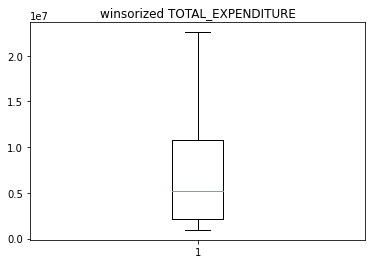

In [21]:
# boxplot of winsorized TOTAL_EXPENDITURE
plt.boxplot(winsorize_exp)
plt.title('winsorized TOTAL_EXPENDITURE')
plt.show()


In [23]:
# Q3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE 
# (before you eliminated the outliers). 
# You can think of it as a kind of budget deficit in education. 
# Do you find any outlier values in this new variable? 
# If so, eliminate them using the technique that think is most suitable.

In [24]:
# subtracting TOTAL_REVENUE from TOTAL_EXPENDITURE
df['BUDGET_DEFICIT'] = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']
# checking for outliers in BUDGET_DEFICIT
z_score_budget = (df['BUDGET_DEFICIT'] - df['BUDGET_DEFICIT'].mean()) / df['BUDGET_DEFICIT'].std()
print(z_score_budget[z_score_budget > 3].count())


7


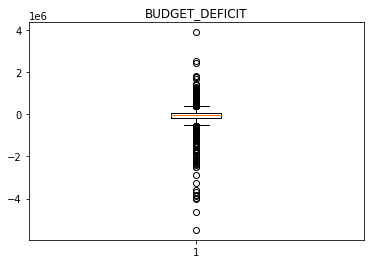

In [25]:
# boxplot of BUDGET_DEFICIT
plt.boxplot(df['BUDGET_DEFICIT'])
plt.title('BUDGET_DEFICIT')
plt.show()


In [26]:
# there are outliers in BUDGET_DEFICIT

In [27]:
from scipy.stats.mstats import winsorize
winsorize_budget = winsorize(np.array(df['BUDGET_DEFICIT'].dropna()), limits=[0.05, 0.095])
winsorize_budget

masked_array(data=[  25087.,   77103., -143501., ...,   25013.,  -90069.,
                     10440.],
             mask=False,
       fill_value=1e+20)

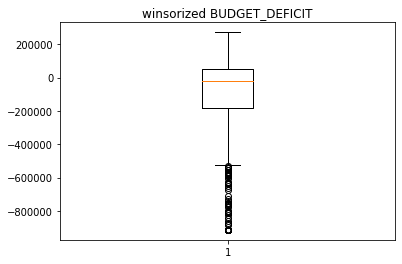

In [28]:
# boxplot of winsorized BUDGET_DEFICIT
plt.boxplot(winsorize_budget)
plt.title('winsorized BUDGET_DEFICIT')
plt.show()

In [29]:
# Q4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. 
# This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. 
# In this newly created variable, can you find any outliers? If so, eliminate them.



In [42]:
# creating  another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE.
df['TOTAL_REVENUE_2'] = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']
# checking for outliers in TOTAL_REVENUE_2
z_score_revenue_2 = (df['TOTAL_REVENUE_2'] - df['TOTAL_REVENUE_2'].mean()) / df['TOTAL_REVENUE_2'].std()
print(z_score_revenue_2[z_score_revenue_2 > 3].count())
z_score_revenue_2 = pd.DataFrame(z_score_revenue_2)
print(z_score_revenue_2.describe())



7
       TOTAL_REVENUE_2
count     1.275000e+03
mean      5.572884e-18
std       1.000000e+00
min      -9.373553e+00
25%      -1.342614e-01
50%       1.442179e-01
75%       2.713131e-01
max       6.966904e+00


In [31]:
# eliminating the outliers in TOTAL_REVENUE_2
from scipy.stats.mstats import winsorize
winsorize_revenue_2 = winsorize(np.array(df['TOTAL_REVENUE_2'].dropna()), limits=[0.05, 0.095])
winsorize_revenue_2


masked_array(data=[  25087.,   77103., -143501., ...,   25013.,  -90069.,
                     10440.],
             mask=False,
       fill_value=1e+20)

In [39]:
#  z-score of winsorized TOTAL_REVENUE_2
z_score_revenue_2 = (winsorize_revenue_2 - winsorize_revenue_2.mean()) / winsorize_revenue_2.std()
print(z_score_revenue_2[z_score_revenue_2 > 3].count())





0


In [40]:
winsorize_revenue_2 = pd.DataFrame(winsorize_revenue_2)
# describe the winsorized TOTAL_REVENUE_2
winsorize_revenue_2.describe()

,0
count,1275.000000
mean,-92209.681569
std,284737.986283
min,-913765.000000
25%,-181308.000000
50%,-21368.000000
75%,51627.000000
max,272099.000000
